In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,6]

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
zomato = pd.read_csv('zomato.csv')
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato.shape

(51717, 17)

In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
zomato.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
len(zomato.name.unique())

8792

In [10]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [11]:
zomato.describe(include='object')

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


### Dropping the unwanted columns

In [12]:
zomato.drop(['url','address','phone','dish_liked','menu_item','reviews_list'],axis=1,inplace=True)

In [13]:
zomato.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

### Treating the missing values

In [14]:
zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
zomato['rate'] = zomato['rate'].apply(lambda x: str(x).replace('/5',''))

In [16]:
def treat_rate(x):
    if (x=='NEW' or x=='-'):
        return np.nan
    else:
        return float(x)
    
zomato['rate'] = zomato['rate'].apply(treat_rate)

In [17]:
zomato.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [18]:
zomato.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [19]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(object)

In [20]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].apply(lambda x: str(x).replace(',',''))

In [21]:
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].astype(float)

In [22]:
zomato['rate'] = zomato['rate'].fillna(zomato['rate'].median())
zomato['location'] = zomato['location'].fillna(zomato['location'].mode()[0])
zomato['rest_type'] = zomato['rest_type'].fillna(zomato['rest_type'].mode()[0])
zomato['cuisines'] = zomato['cuisines'].fillna(zomato['cuisines'].mode()[0])
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].fillna(zomato['approx_cost(for two people)'].median())

In [23]:
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

<AxesSubplot:>

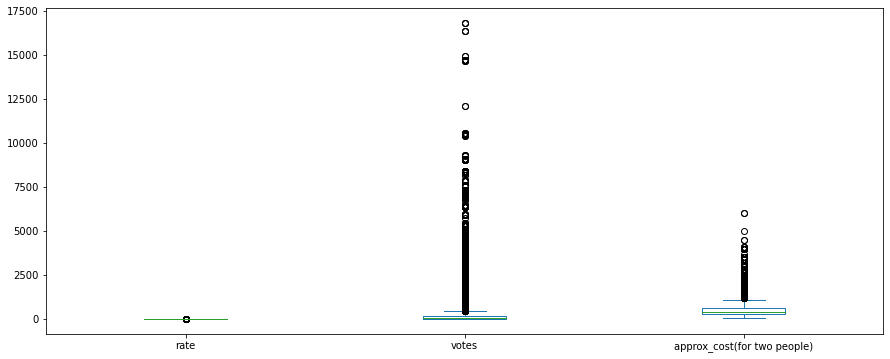

In [24]:
zomato.plot(kind='box')

In [25]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


<AxesSubplot:>

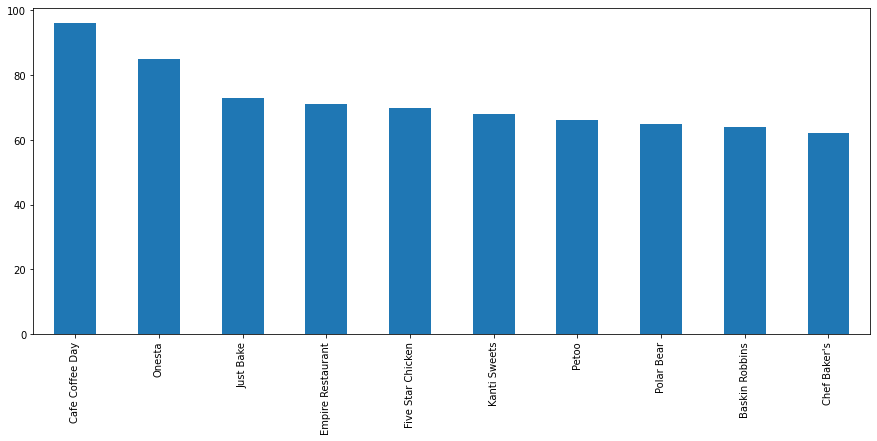

In [26]:
zomato.name.value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

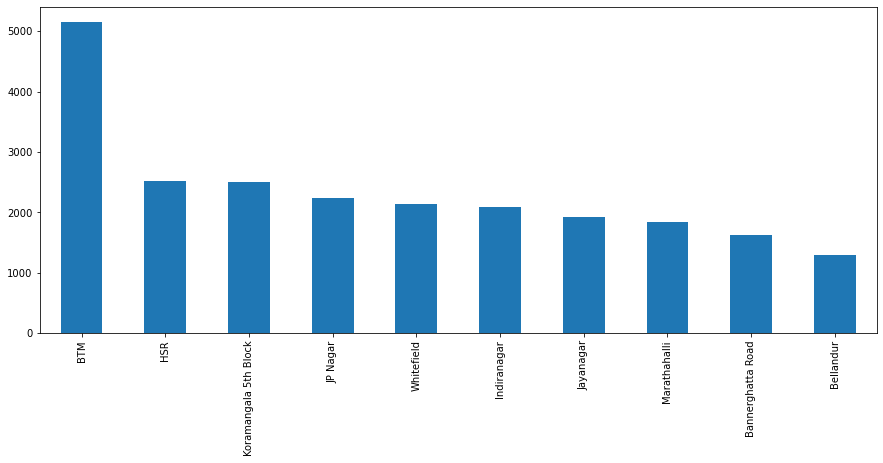

In [27]:
zomato.location.value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

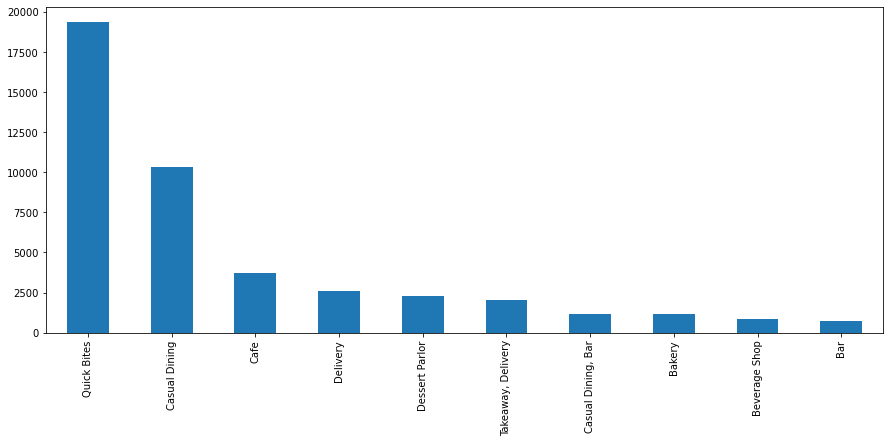

In [28]:
zomato['rest_type'].value_counts()[:10].plot(kind='bar')

In [29]:
zomato['rest_type'].value_counts()[zomato['rest_type'].value_counts()>1000]

Quick Bites           19359
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64

In [30]:
extra = zomato['rest_type'].value_counts()[zomato['rest_type'].value_counts()<1000]

In [31]:
def treat_rest(x):
    if x in extra:
        return 'others'
    else:
        return x

In [32]:
zomato['rest_type'] = zomato['rest_type'].apply(treat_rest)

In [33]:
zomato['rest_type'].value_counts()

Quick Bites           19359
Casual Dining         10330
others                 9097
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64

In [34]:
zomato['listed_in(type)'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [35]:
zomato['listed_in(city)'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: listed_in(city), dtype: int64

In [36]:
extra1 = zomato['location'].value_counts()[zomato['location'].value_counts()<300]

In [37]:
def treat_location(x):
    if x in extra1:
        return 'others'
    else:
        return x

In [38]:
zomato['location'] = zomato['location'].apply(treat_location)

In [39]:
zomato['location'].value_counts()

BTM                      5145
others                   4707
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Sarjapur Road            1065
Ulsoor                   1023
Koramangala 4th Block    1017
MG Road                   918
Banashankari              906
Kalyan Nagar              853
Richmond Road             812
Frazer Town               727
Malleshwaram              725
Basavanagudi              684
Residency Road            675
Banaswadi                 664
Brookefield               658
New BEL Road              649
Kammanahalli              648
Rajajinagar               591
Church Street             569
Lavelle Ro

In [40]:
extra2 = zomato['cuisines'].value_counts()[zomato['cuisines'].value_counts()<100]

In [41]:
def treat_cuisine(x):
    if x in extra2:
        return 'others'
    else:
        return x

In [42]:
zomato['cuisines'] = zomato['cuisines'].apply(treat_cuisine)

In [43]:
zomato['cuisines'].value_counts()

others                                 26460
North Indian                            2958
North Indian, Chinese                   2385
South Indian                            1828
Biryani                                  918
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

### Outlier removal

In [44]:
check = zomato[['votes','approx_cost(for two people)']]

q1 = check.quantile(0.25)
q3 = check.quantile(0.75)
iqr = q3 - q1

ll = q1 - 2 * iqr
ul = q3 + 2 * iqr

data = zomato[~((check<ll)|(check>ul)).any(axis=1)]
data.shape

(44168, 11)

### Univariate analysis

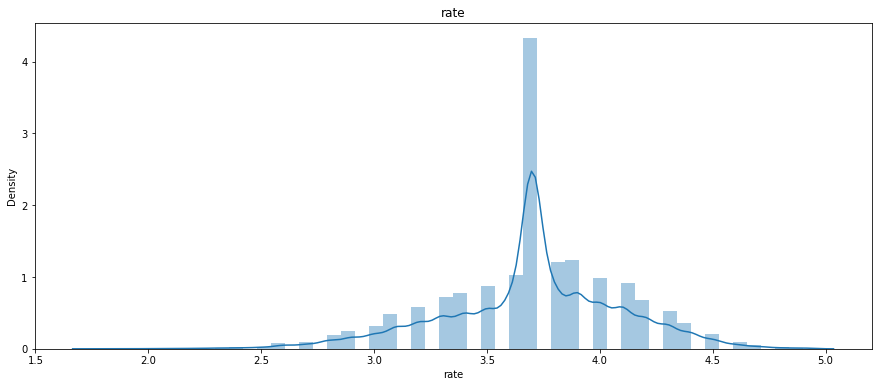

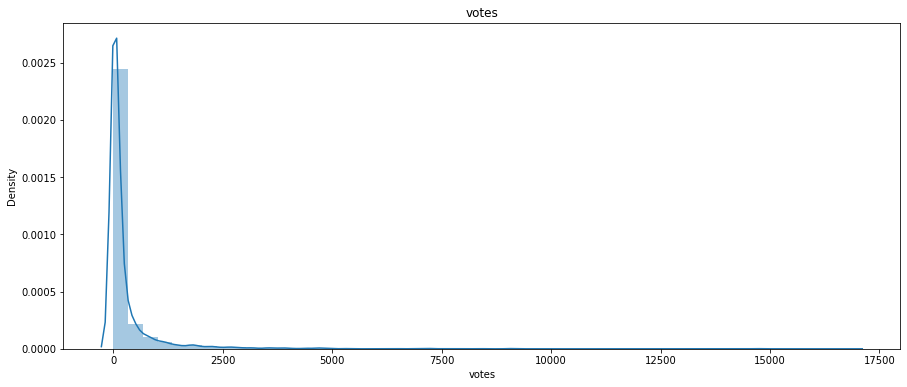

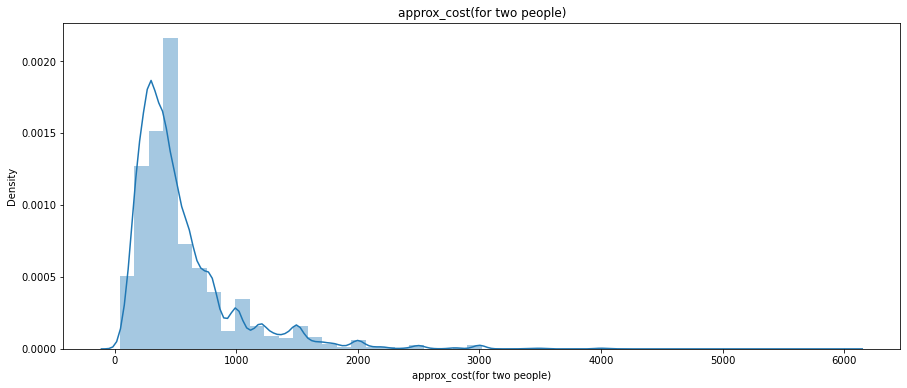

In [45]:
# for Numerical columns
num = zomato.select_dtypes(include=np.number)
for i in num:
    sns.distplot(zomato[i])
    plt.title(i)
    plt.show()

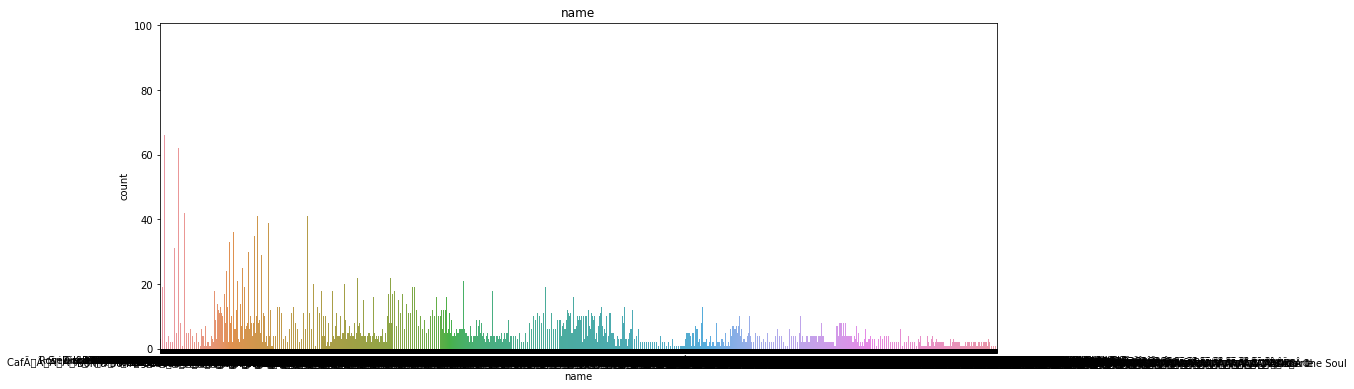

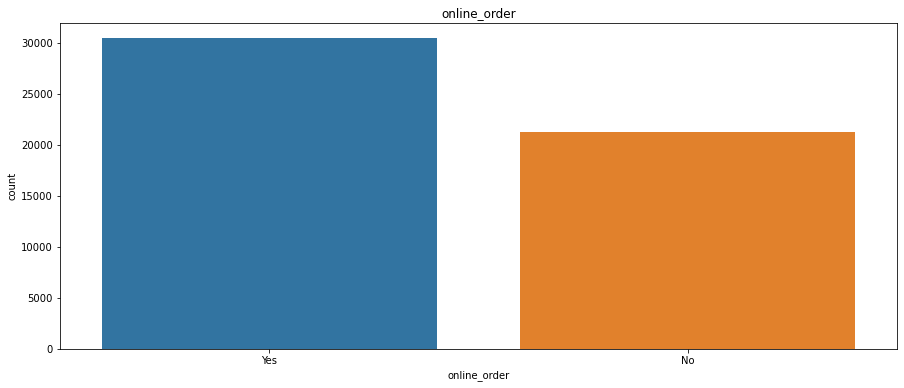

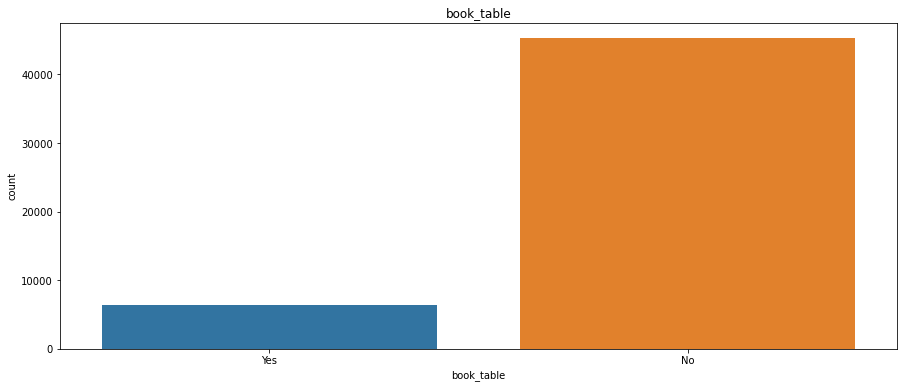

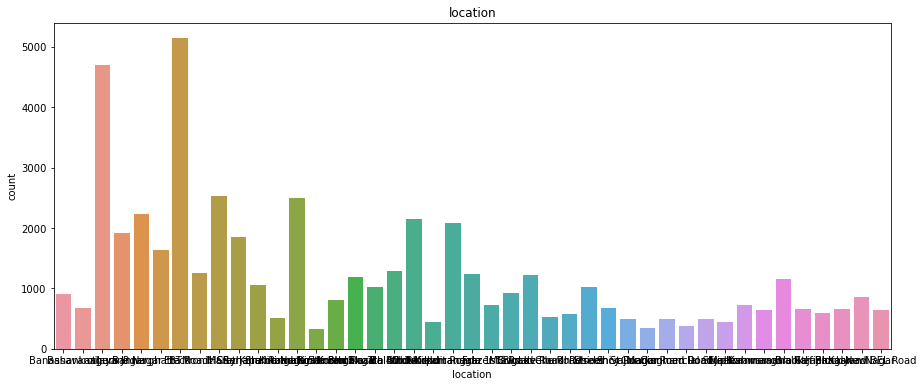

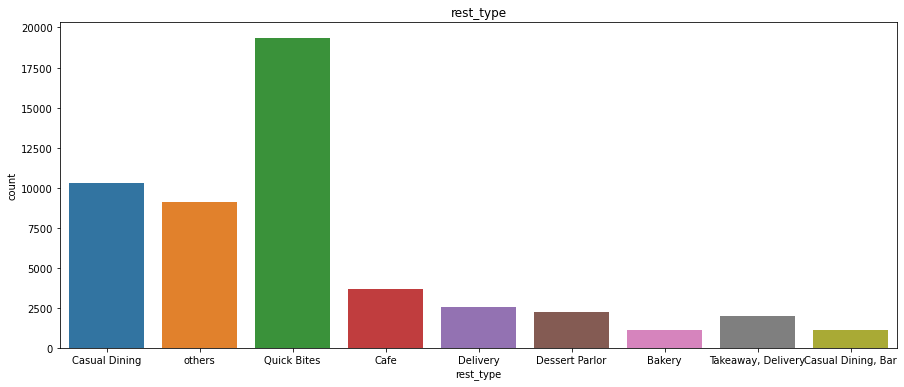

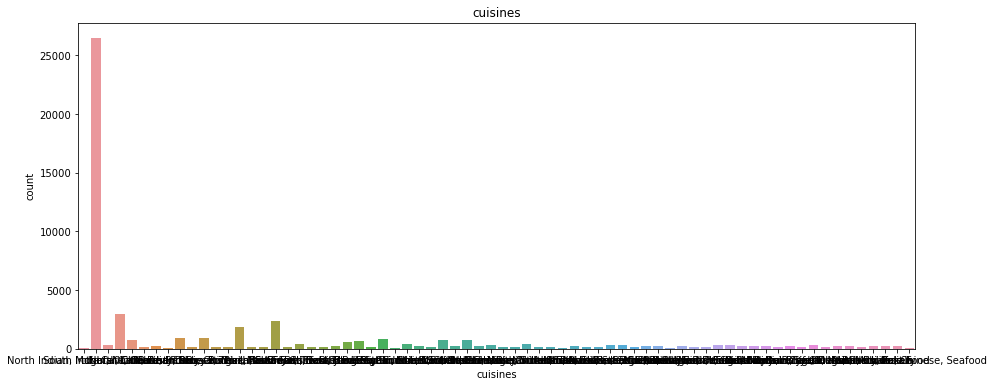

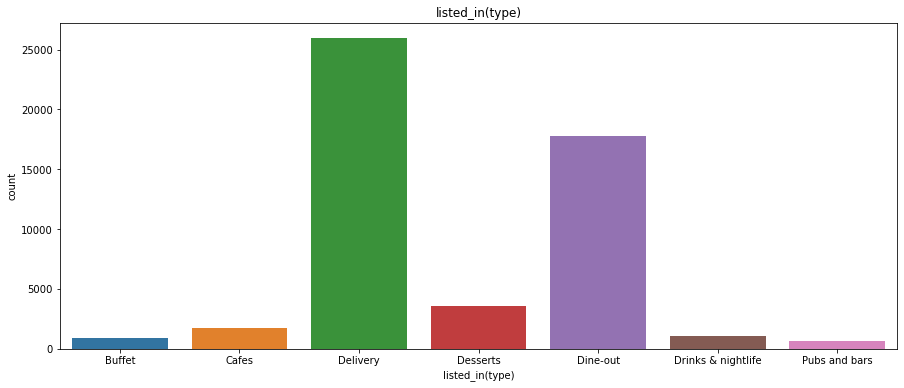

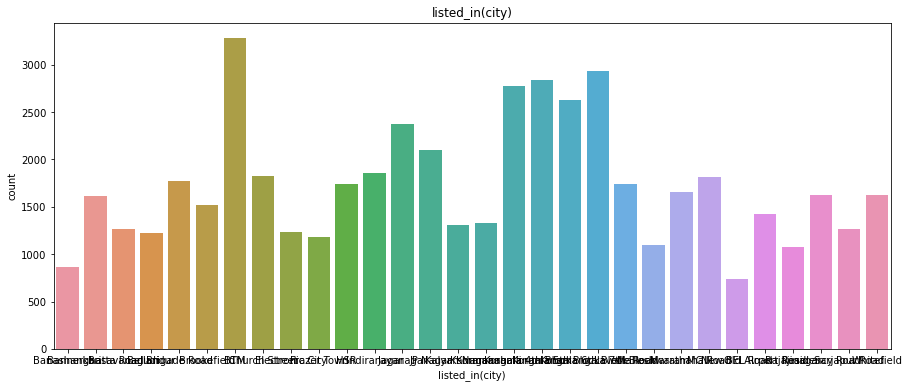

In [46]:
# for Categorical columns
cat = zomato.select_dtypes(include='object')
for i in cat:
    sns.countplot(zomato[i])
    plt.title(i)
    plt.show()

### Bivariate analysis

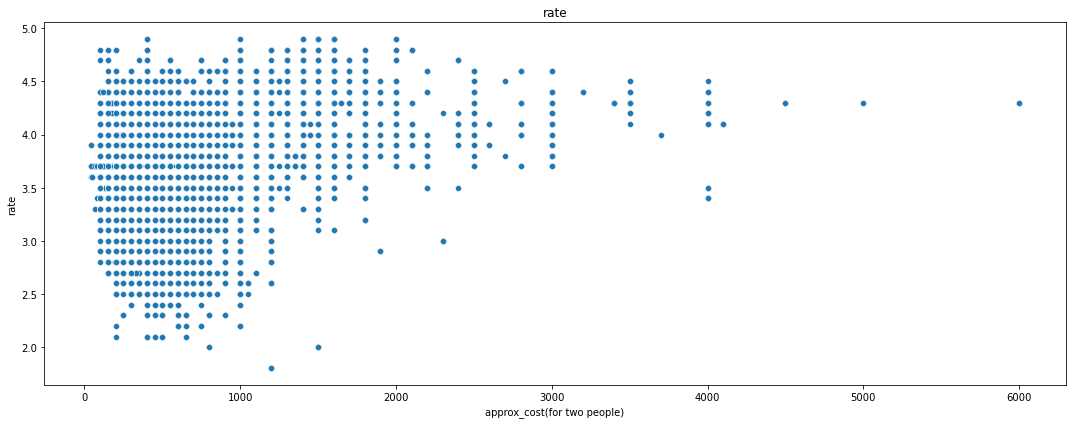

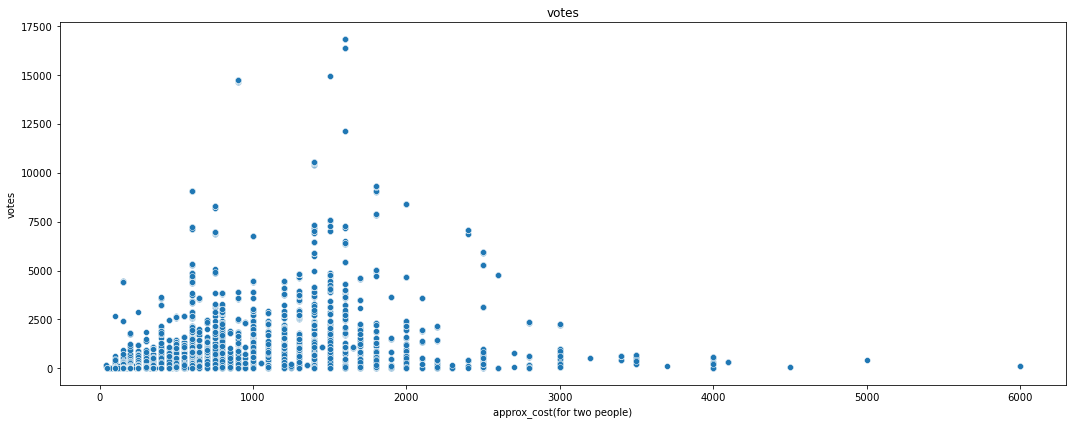

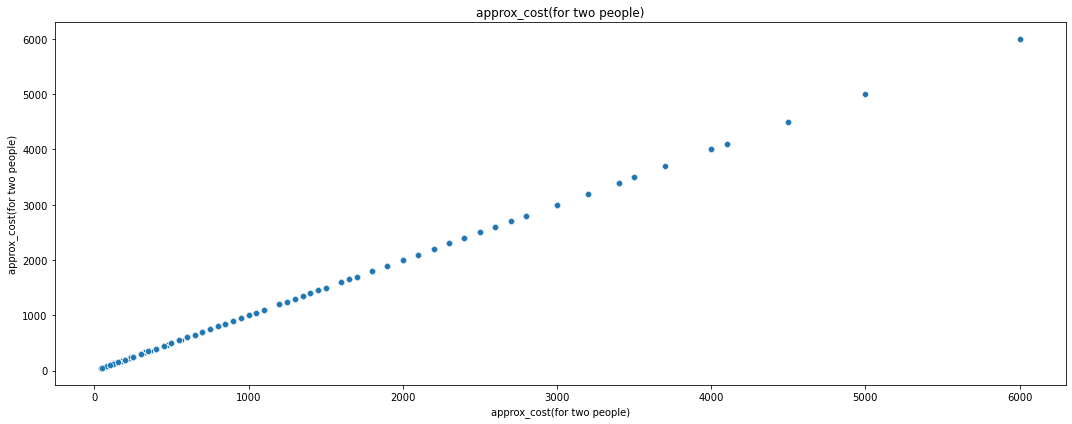

In [47]:
# Num vs Num : Scatterplot
for i in num:
    sns.scatterplot(data=zomato, x='approx_cost(for two people)', y=zomato.loc[:,i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

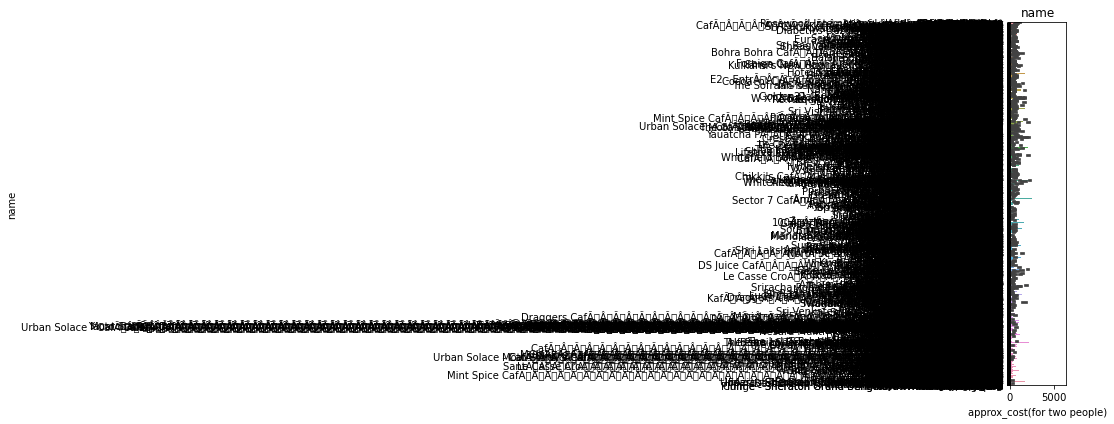

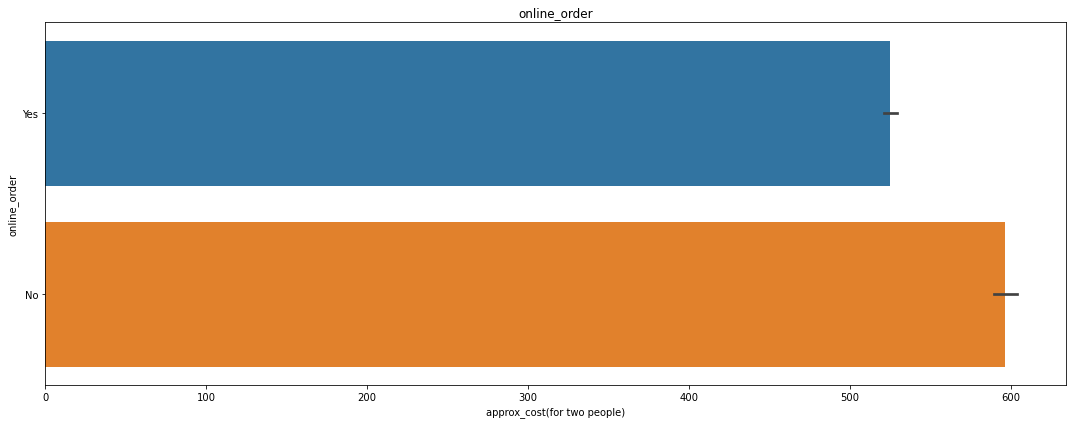

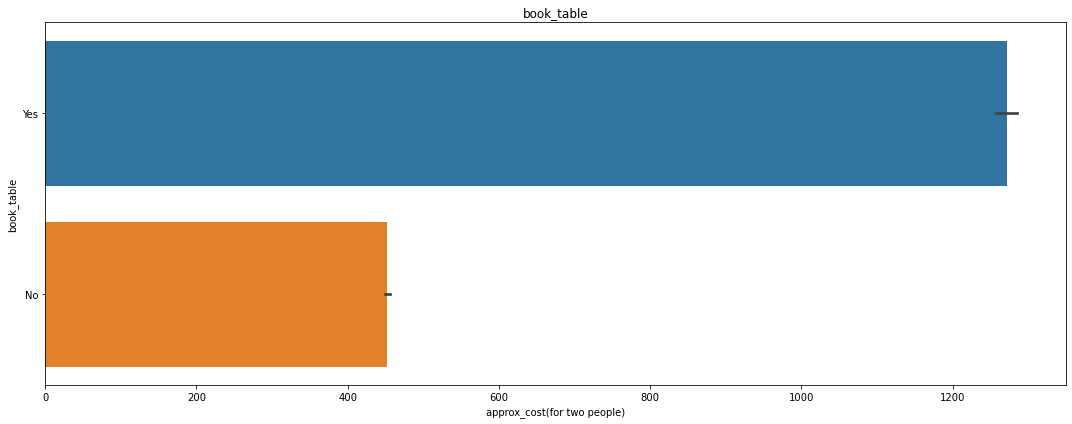

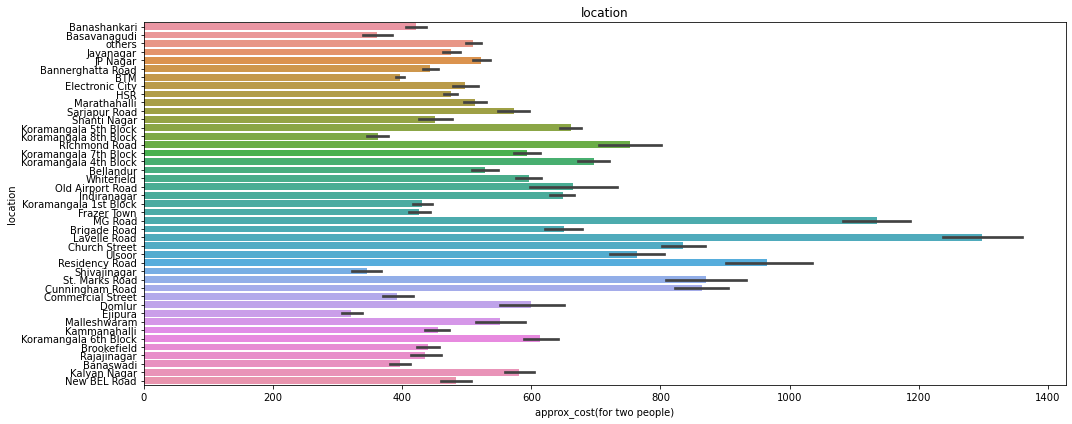

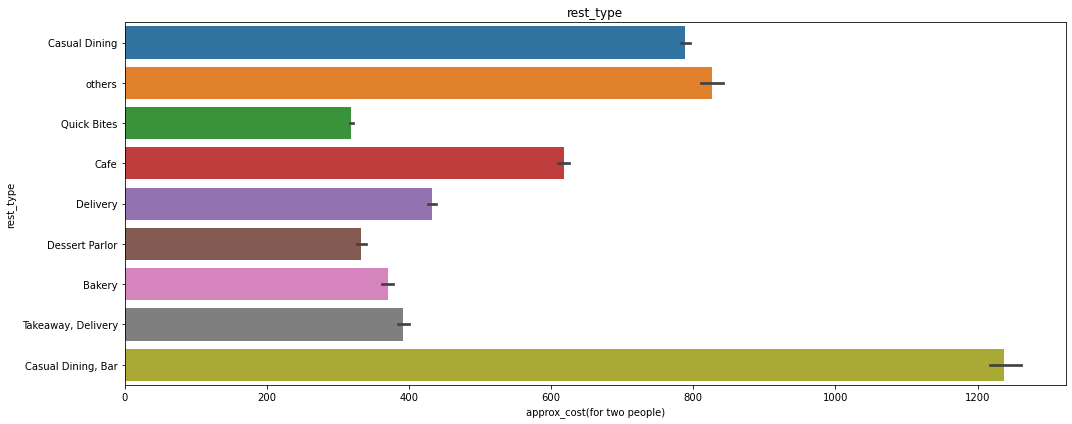

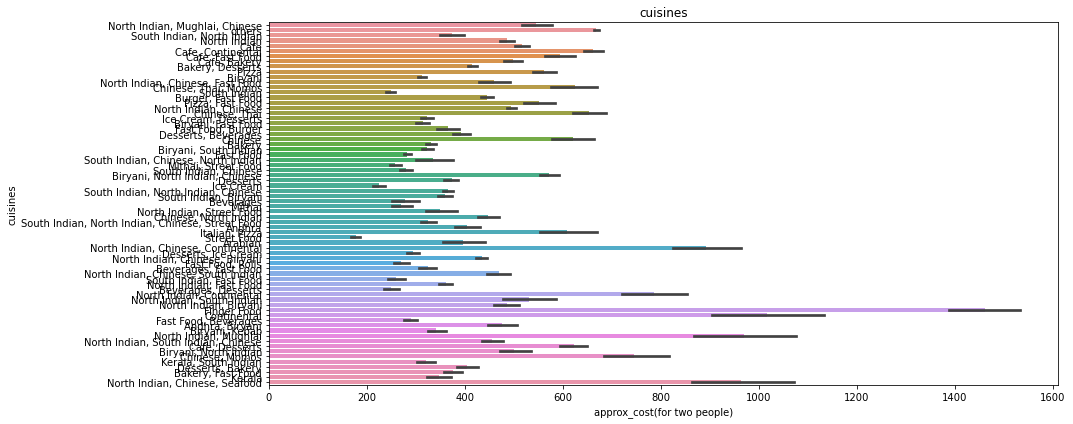

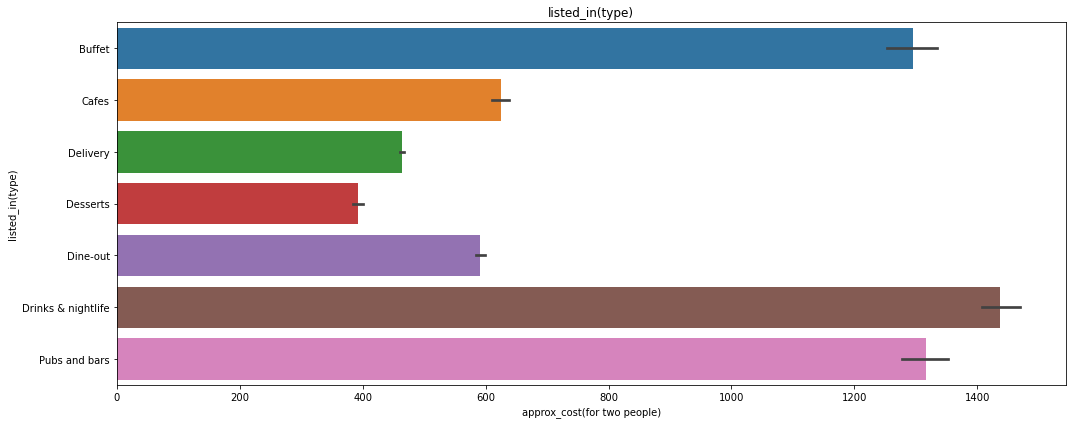

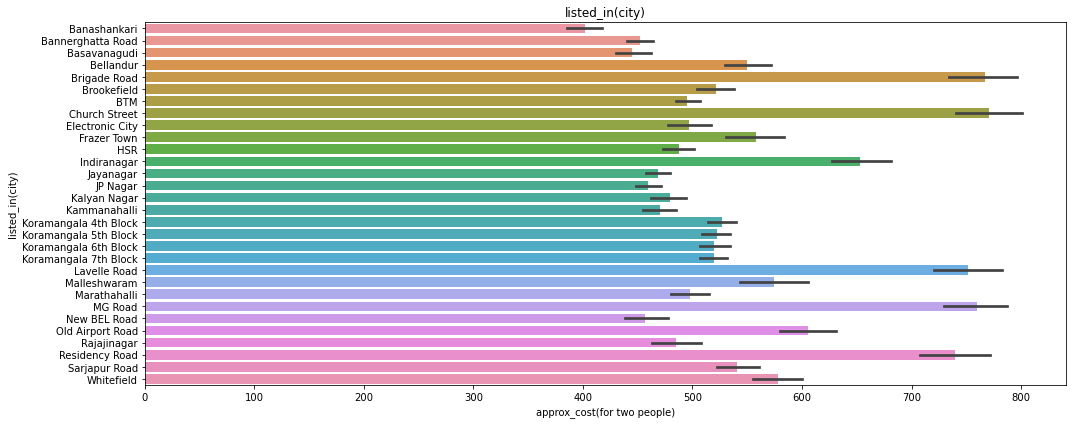

In [48]:
# Cat vs Num : boxplot/violinplot and barplot
for i in cat:
    sns.barplot(data=zomato, x='approx_cost(for two people)', y=zomato.loc[:,i])
    plt.title(i)
    plt.tight_layout()
    plt.show()

### Multivariate analysis

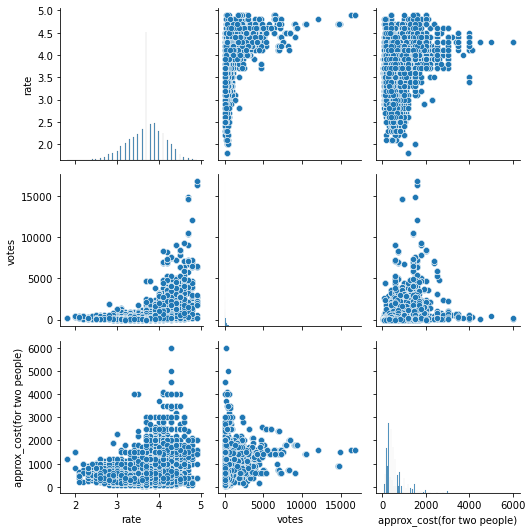

In [49]:
sns.pairplot(zomato)
plt.tight_layout()
plt.show()

### Correlation analysis

<AxesSubplot:>

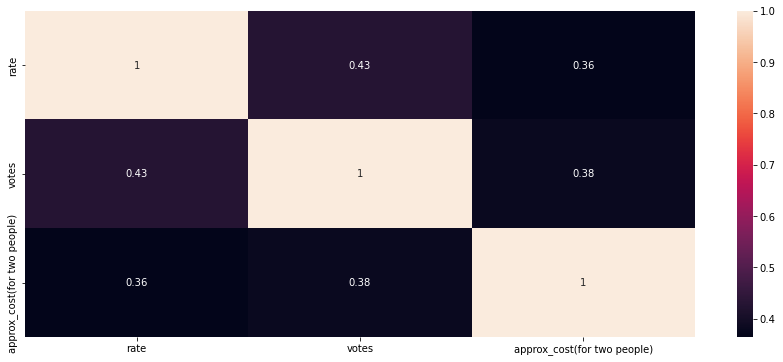

In [50]:
sns.heatmap(zomato.corr(), annot=True)

### Perform hypothesis testing to find the significant variables

In [46]:
df = data.copy()

In [47]:
# H0 : The variable is insignificant (No relationship between variable and target)
# H1 : The variable is significant (There is a relationship between variable and target)
# We carry out tests for each column wrt the target column.
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [48]:
df.dtypes
# When both the columns that need to be tested are numerical, we use z-test

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [49]:
from scipy import stats

In [65]:
cols = ['name', 'online_order', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'listed_in(type)', 'book_table_yes']
for i in cols:
    n1 = len(df['approx_cost(for two people)'])
    n2 = len(df[i])
    mean1 = np.mean(df['approx_cost(for two people)'])
    mean2 = np.mean(df[i])
    std1 = np.std(df['approx_cost(for two people)'])
    std2 = np.std(df[i])
    num = (mean1 - mean2) if mean1>mean2 else (mean2 - mean1)
    denom = np.sqrt((std1*std1 / n1) + (std2*std2 / n2))
    z = num/denom
    pval = stats.norm.sf(z)
    print('z of',i,'is',z)
    print('P_value of',i,'is',pval)
    print('')

z of name is 0.6873517186334653
P_value of name is 0.24593055746704567

z of online_order is 388.7663703686221
P_value of online_order is 0.0

z of rate is 386.05756450459705
P_value of rate is 0.0

z of votes is 281.1734950916281
P_value of votes is 0.0

z of location is 389.2578956162335
P_value of location is 0.0

z of rest_type is 389.0743594867187
P_value of rest_type is 0.0

z of cuisines is 47.39888938531839
P_value of cuisines is 0.0

z of listed_in(type) is 386.8328747419087
P_value of listed_in(type) is 0.0

z of book_table_yes is 389.2530253134972
P_value of book_table_yes is 0.0



### Encoding

In [51]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes,Banashankari


In [52]:
data['book_table_yes'] = pd.get_dummies(data['book_table'],drop_first=True)

In [53]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),book_table_yes
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari,0
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari,0
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet,Banashankari,0
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes,Banashankari,0


In [54]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [55]:
dic = data['rest_type'].value_counts(normalize=True).to_dict()

data['rest_type'] = data['rest_type'].map(dic)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()
data['listed_in(type)'] = le.fit_transform(data['listed_in(type)'])
data['online_order'] = le.fit_transform(data['online_order'])

In [60]:
dic1 = data['location'].value_counts(normalize=True).to_dict()

data['location'] = data['location'].map(dic1)

In [61]:
data['name'] = data['name'].map(data.groupby('name')['approx_cost(for two people)'].median())

In [62]:
data['cuisines'] = data['cuisines'].map(data.groupby('cuisines')['approx_cost(for two people)'].median())

In [63]:
data['listed_in(city)'] = data['listed_in(city)'].map(data.groupby('listed_in(city)')['approx_cost(for two people)'].median())

In [64]:
df = data.copy()

In [66]:
df.drop(['book_table'],axis=1,inplace=True)

In [67]:
df.drop('listed_in(city)',axis=1,inplace=True)

In [68]:
df.head()

,name,online_order,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),book_table_yes
3,300.0,0,3.7,88,0.018565,0.429564,300.0,300.0,0,0
4,600.0,0,3.8,166,0.014966,0.177006,400.0,600.0,0,0
5,600.0,1,3.8,286,0.014966,0.177006,400.0,600.0,0,0
6,800.0,0,3.6,8,0.098080,0.177006,400.0,800.0,0,0
8,700.0,1,4.0,324,0.018565,0.068760,400.0,700.0,1,0


### Regression

In [72]:
X_base = df.drop('approx_cost(for two people)',axis=1)
y = df['approx_cost(for two people)']
X = sm.add_constant(X_base)

In [73]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(30917, 10)
(13251, 10)
(30917,)
(13251,)


In [74]:
base_model = sm.OLS(ytrain, Xtrain).fit()
print(base_model.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.960
Model:                                     OLS   Adj. R-squared:                  0.960
Method:                          Least Squares   F-statistic:                 8.347e+04
Date:                         Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                                 22:31:22   Log-Likelihood:            -1.6252e+05
No. Observations:                        30917   AIC:                         3.251e+05
Df Residuals:                            30907   BIC:                         3.251e+05
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [76]:
num_cols = ['name','rate','votes','cuisines']
sc= StandardScaler()

Xtrain[num_cols] = sc.fit_transform(Xtrain[num_cols])
Xtest[num_cols] = sc.fit_transform(Xtest[num_cols])

In [77]:
Xtrain

,const,name,online_order,rate,votes,location,rest_type,cuisines,listed_in(type),book_table_yes
24279,1.0,1.134052,1,1.345470,2.483757,0.013562,0.177006,0.242412,2,0
42657,1.0,-0.582959,1,-0.342288,-0.590340,0.015577,0.045712,-0.344621,2,0
9566,1.0,-0.582959,1,0.220298,-0.672755,0.111642,0.045712,0.242412,2,0
9078,1.0,-0.153706,1,-0.060995,-0.557374,0.021260,0.177006,0.242412,2,0
30206,1.0,0.275546,1,-0.623581,-0.219470,0.111642,0.056715,-0.931654,2,0
...,...,...,...,...,...,...,...,...,...,...
7233,1.0,0.168233,0,-0.623581,-0.598582,0.041433,0.429564,0.242412,2,0
13104,1.0,0.275546,0,-0.060995,-0.417267,0.098080,0.177006,-0.931654,4,0
44532,1.0,0.275546,1,0.220298,-0.186504,0.012769,0.429564,0.242412,4,0
930,1.0,-0.153706,1,-0.060995,0.258539,0.044014,0.045712,0.242412,2,0


In [78]:
linreg = sm.OLS(ytrain, Xtrain).fit()
print(linreg.summary())

                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.960
Model:                                     OLS   Adj. R-squared:                  0.960
Method:                          Least Squares   F-statistic:                 8.347e+04
Date:                         Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                                 22:31:36   Log-Likelihood:            -1.6252e+05
No. Observations:                        30917   AIC:                         3.251e+05
Df Residuals:                            30907   BIC:                         3.251e+05
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [79]:
ytrain_pred = linreg.predict(Xtrain)
ytrain.head()

24279    700.0
42657    300.0
9566     300.0
9078     400.0
30206    500.0
Name: approx_cost(for two people), dtype: float64

In [80]:
ytest_pred = linreg.predict(Xtest)
ytest.head()

11010     300.0
32646     600.0
51542     250.0
12657    1200.0
29412     350.0
Name: approx_cost(for two people), dtype: float64

In [81]:
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)
print('RMSE train:', np.sqrt(mse_train))
print('RMSE test:', np.sqrt(mse_test))
print()
mape_train = mean_absolute_percentage_error(ytrain, ytrain_pred)
mape_test = mean_absolute_percentage_error(ytest, ytest_pred)
print('MAPE train:', mape_train)
print('MAPE test:', mape_test)

RMSE train: 46.41976845622504
RMSE test: 48.07665141285605

MAPE train: 0.04138307235006992
MAPE test: 0.04800196321959144


### Classification

In [93]:
X = df.drop('online_order',axis=1)
y = df['online_order']
X_base = sm.add_constant(X)

In [95]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_base,y, test_size=0.3, random_state=42)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(30917, 10)
(13251, 10)
(30917,)
(13251,)


In [96]:
logreg = sm.Logit(y_train1, X_train1).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.608786
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           online_order   No. Observations:                30917
Model:                          Logit   Df Residuals:                    30907
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                 0.09945
Time:                        17:16:25   Log-Likelihood:                -18822.
converged:                       True   LL-Null:                       -20900.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.1615      0.162      7.175      0.000   

<AxesSubplot:xlabel='online_order', ylabel='count'>

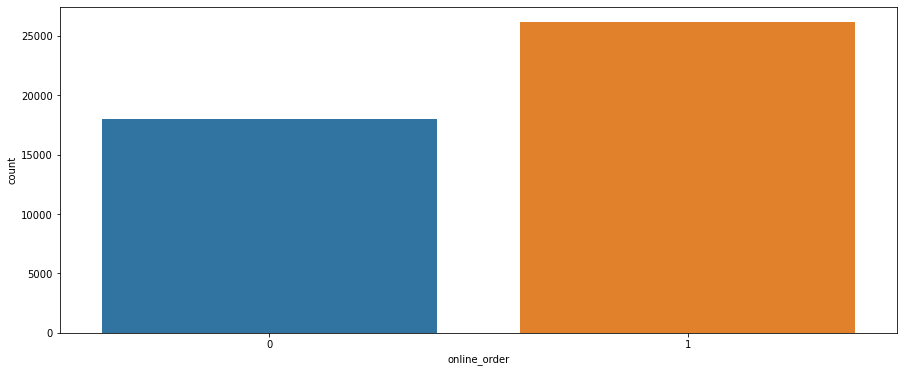

In [64]:
sns.countplot(df['online_order'])

In [65]:
df['online_order'].value_counts(normalize=True)

1    0.591854
0    0.408146
Name: online_order, dtype: float64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30917, 9)
(13251, 9)
(30917,)
(13251,)


In [66]:
DT_classification = DecisionTreeClassifier(random_state=42)
decision_tree = DT_classification.fit(X_train,y_train)

In [67]:
y_pred = decision_tree.predict(X_test)
y_pred_prob = decision_tree.predict_proba(X_test)[:,1]

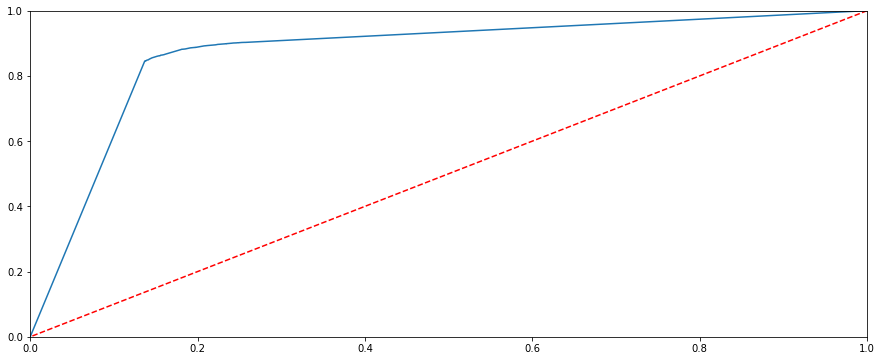

In [68]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([1,0],[1,0],'r--')

In [69]:
from sklearn import metrics

In [70]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.8707927175768627

In [71]:
accuracy_score(y_test, y_pred)

0.8550298090710136

In [72]:
params = {'criterion':['entropy','gini'],
         'min_samples_split':range(3,7),
         'max_depth':range(8,15)}

tree_model = GridSearchCV(estimator=decision_tree, param_grid=params, cv=5)
tree_model.fit(X_train, y_train)
tree_model.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 3}

In [73]:
DT = DecisionTreeClassifier(criterion='gini',
                           min_samples_split=3,
                           max_depth=14)

decision_tune = DT.fit(X_train, y_train)

In [74]:
y_pred_tune = decision_tune.predict(X_test)
y_pred_prob_tune = decision_tune.predict_proba(X_test)[:,1]

In [75]:
metrics.roc_auc_score(y_test, y_pred_prob_tune)

0.8485142632172876

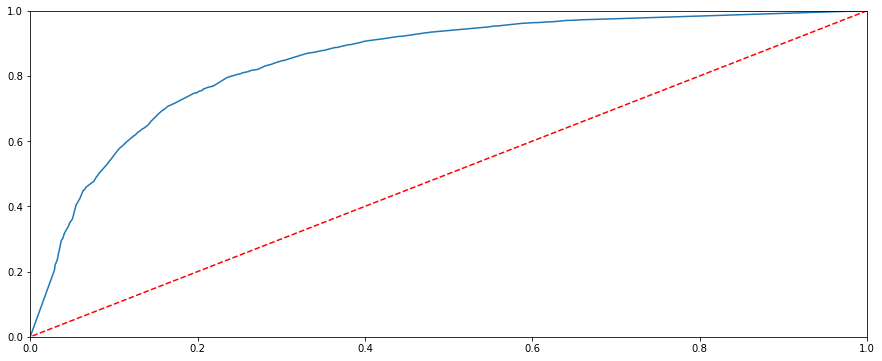

In [76]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_tune)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([1,0],[1,0],'r--')

In [77]:
Random = RandomForestClassifier(random_state=42)
random_forest = Random.fit(X_train, y_train)

In [78]:
y_pred_r = random_forest.predict(X_test)
y_pred_prob_r = random_forest.predict_proba(X_test)[:,1]

In [79]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.8707927175768627

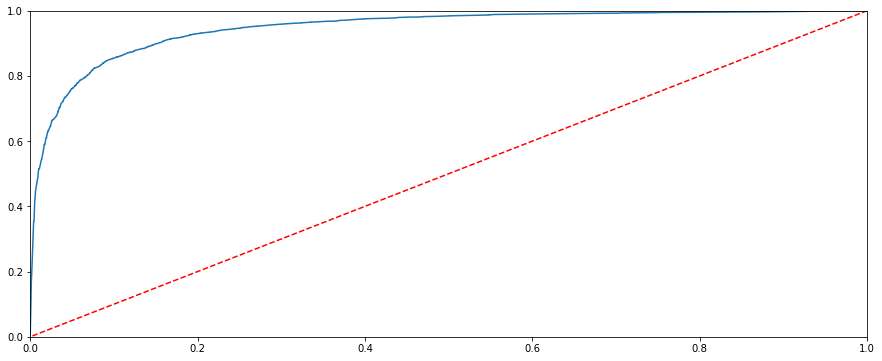

In [80]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_r)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([1,0],[1,0],'r--')

In [81]:
params = {'criterion':['entropy','gini'],
         'n_estimators':[100,150],
         'max_depth':range(8,15),
         'max_features':['sqrt','log2','auto']}
rf = RandomForestClassifier()

In [82]:
rand_model = GridSearchCV(estimator=rf, param_grid=params, cv=3)
rand_model.fit(X_train, y_train)
rand_model.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'log2',
 'n_estimators': 150}

In [83]:
rfc = RandomForestClassifier(criterion='gini',
                            n_estimators=150,
                            max_depth=14,
                            max_features='log2')

random_forest_tune = rfc.fit(X_train, y_train)

In [85]:
y_pred_tuner = random_forest_tune.predict(X_test)
y_pred_prob_tuner = random_forest_tune.predict_proba(X_test)[:,1]

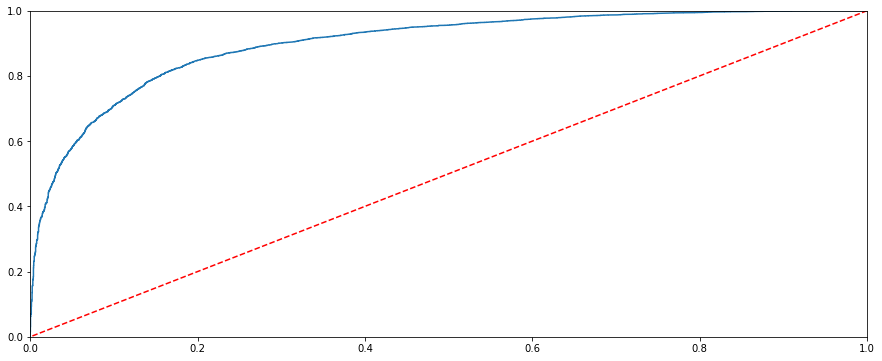

In [86]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_tuner)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([1,0],[1,0],'r--')

In [88]:
metrics.roc_auc_score(y_test, y_pred_prob_tuner)

0.9001387623378525